# Corona Impact Analysis

TODO: Explanation and links to code here

In [1]:
%load_ext lab_black
%load_ext autoreload
%autoreload 2
from functools import partial
from datetime import date

import ipywidgets as widgets
import numpy as np
import pandas as pd
from pandas.testing import assert_series_equal
import seaborn as sns

from seir import Seir

In [2]:
sns.set_style("white")

In [3]:
parameters = {
    "r0": 2.4,
    "t_incubation": 4.6,
    "t_presymptomatic": 0.5,
    "t_recovery_asymptomatic": 6,
    "t_recovery_mild": 6,
    "t_home_severe": 5,
    "t_hospital_severe_recovered": 10.4,
    "t_hospital_severe_deceased": 10.4,
    "p_asymptomatic": 0.3,
    "p_severe": 0.044,
    "p_fatal": 0.009,
    "p_self_quarantine": 0.66,
    "p_icu_given_hospital": 0.30,
}

start = {
    "T": 0.0,
    "S": (1 - 0.006 / 10000),
    "E": 0.006
    / 10000,  # assuming 50 people had just caught the virus (currently assumed to be 15/01/2020)
    "I": 0.0,
    "I_asymptomatic": 0.0,
    "I_mild": 0.0,
    "I_severe_home": 0.0,
    "I_severe_hospital": 0.0,
    "I_fatal_home": 0.0,
    "I_fatal_hospital": 0.0,
    "R_from_asymptomatic": 0.0,
    "R_from_mild": 0.0,
    "R_from_severe": 0.0,
    "Dead": 0,
    "Hypothetical R0": 2.4,
}

In [4]:
def update_results(
    start,
    params,
    # Policy
    policy_period0,
    policy_period1,
    policy_period2,
    policy_period3,
    policy_period4,
    date_period0,
    date_period1,
    date_period2,
    date_period3,
    date_period4,
    # Parameters
    # Starting Values
):

    policy = [
        (date_period0, policy_period0),
        (date_period1, policy_period1),
        (date_period2, policy_period2),
        (date_period3, policy_period3),
        (date_period4, policy_period4),
    ]

    # params={}
    # start={}

    # Run
    seir = Seir(params=params, start=start)
    seir.simulate(policy)
    seir.plot_summary()
    return None


update_results_partial = partial(update_results, start=start, params=parameters)

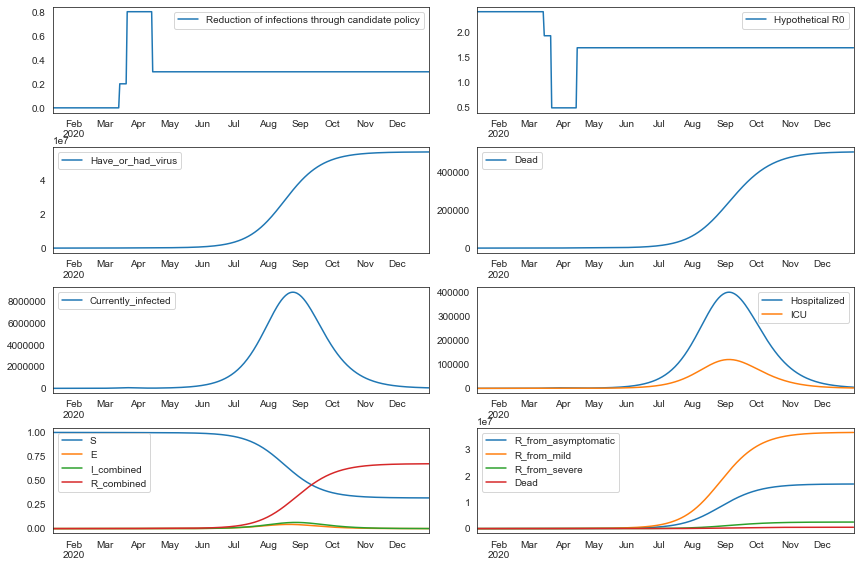

In [5]:
def policy_widget(description, date, policy=0):
    text_box = widgets.Text(value=date, description=description, disabled=False,)
    float_box = widgets.FloatSlider(
        value=policy,
        min=0,
        max=1,
        step=0.1,
        description="Policy Strength",
        disabled=False,
        continuous_update=False,
        orientation="horizontal",
        readout=True,
        readout_format=".1f",
    )
    return text_box, float_box


# Policy Box
text_box0, float_box0 = policy_widget("Beginning of simulation", "2020-01-12", policy=0)
text_box1, float_box1 = policy_widget("Policy intervention 1", "2020-03-14", policy=0.2)
text_box2, float_box2 = policy_widget("Policy intervention 2", "2020-03-21", policy=0.8)
text_box3, float_box3 = policy_widget("Policy intervention 3", "2020-04-14", policy=0.3)
text_box4, float_box4 = policy_widget("End of simulatiion", "2020-12-31")


policy_box = widgets.VBox(
    [
        widgets.HBox([text_box0, float_box0]),
        widgets.HBox([text_box1, float_box1]),
        widgets.HBox([text_box2, float_box2]),
        widgets.HBox([text_box3, float_box3]),
        widgets.HBox([text_box4, float_box4]),
    ]
)

# Parameters (placeholder)
parameters_box = widgets.VBox()

# Starting Values (placeholder)
start_box = widgets.VBox()

# Combine inputs in tabs
input_tab = widgets.Tab()
input_tab.children = [policy_box, parameters_box, start_box]
input_tab.set_title(0, "Policy")
input_tab.set_title(1, "Parameters")
input_tab.set_title(2, "Starting Values")

# Output box
output_box = widgets.interactive_output(
    update_results_partial,
    {
        "policy_period0": float_box0,
        "policy_period1": float_box1,
        "policy_period2": float_box2,
        "policy_period3": float_box3,
        "policy_period4": float_box4,
        "date_period0": text_box0,
        "date_period1": text_box1,
        "date_period2": text_box2,
        "date_period3": text_box3,
        "date_period4": text_box4,
    },
)

# Combination
dash = widgets.VBox([output_box, input_tab])
dash